<a href="https://colab.research.google.com/github/pedro-de-bastos/cs156/blob/master/CS156_LBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS156 LBA: PCA
By: Pedro Martins de Bastos
Please access my github here to download the jupyter notebook:

##1. Processing Photos

In [116]:
from PIL import Image
import PIL.ImageOps
from glob import glob
from random import shuffle, seed
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl


#I took a large chunk of this code from Grus, J. (2013)
STANDARD_SIZE = (400,400) #The size for my processed images
HALF_SIZE = (STANDARD_SIZE[0]/2,STANDARD_SIZE[1]/2)

    
def img_to_array(filename):
    """
    Takes a filename and turns it into a 1D numpy array of RGB pixels
    """
    img = Image.open(filename)
    img = img.resize(STANDARD_SIZE)
    
    img = list(img.getdata())
    map(list(), img)
    img = np.array(img)
    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s) #reshaping to long row representation
    return -img_wide[0]

#Obtaining all filenames of the .jpg images in the directory
files = glob('*.jpg') 

raw_data=[]

for filename in files: 
    print(filename)
    raw_data.append((img_to_array("/content/"+filename),filename))

100k070000002grli6B0F_C_800_800.jpg
80044251_165290008181221_4480231648570176004_n.jpg
IMG_20200114_193016.jpg
Puente_de_la_Mujer,_Puerto_Madero,_Buenos_Aires-06.jpg
2632266_PwfFDSzRb4boTs-Ct2dphM7EfeLajsjcrF1mh8euLyg.jpg
747c804a4eb936d98cac36eeba1d2cb0.jpg
IMG_20200114_193020.jpg
15995_V0z6imFsRFGsNRpRmmLscg7KevSnAKujt_BIcvTfwgs.jpg
13106028_HeIjrQHmt5N-sd_QBwdU5iq5iAsuAh23DWyeFdZP9M4.jpg
fixedw_large_2x.jpg
q5aoscienp2muccraijs.jpg
81022298_450180899258851_2693359449230004194_n.jpg
puente-de-la-mujer-a.jpg
25510930_jywYliFNpC1XqYIrxblJEr8BAQsRFu-C9sg67bk4Gq4 (1).jpg
50938220_2482213981850295_2447790457630235940_n.jpg
80788230_123261429176653_3826343528592752576_n.jpg
25510930_jywYliFNpC1XqYIrxblJEr8BAQsRFu-C9sg67bk4Gq4.jpg
67660447_415297692422189_3194477084957231529_n.jpg
79516024_2620992331462875_223556821806461462_n.jpg
100n0e000000767aa36BC_C_800_800.jpg


## 2. PCA to 2D

In [117]:
data = np.array([cd for (cd,f) in raw_data]) 
X_train = data

pca = PCA(2) #Here I make the choice to use only 2 components
X_train = pca.fit_transform(X_train)
pca.components_.shape 
#here I verify the shape of the components: there are two components, each with
#480000 values = 3(rgb)*400pixels*400pixels


(2, 480000)

## 3. Presenting Images in the 2D Space

Text(0.5, 1.0, '2D Representation of the Data')

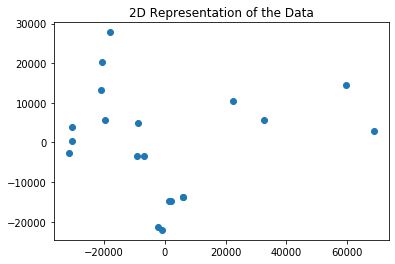

In [108]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.title("2D Representation of the Data")

One question I had was: to what extent do these two dimensions account for the variance? I used the simple code below to answer this:

In [109]:
pca.explained_variance_ratio_

array([0.41011543, 0.1014765 ])

In other words, the first dimension explains around 41% of the variance, and the second dimension explains around 10% of the variance.

## 4. Showing the Low Dimension Reconstructions

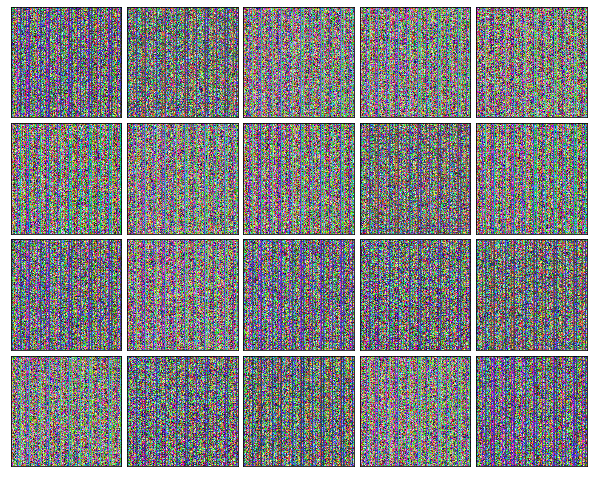

In [110]:
fig = plt.figure(figsize=(8,8)) #Setting up a figure for display
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
  img = X_train[i][0]*pca.components_[0]+X_train[i][1]*pca.components_[1]
  img = np.reshape(img, (400,400,3))
  img = Image.fromarray(img, mode="RGB")
  ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
  ax.imshow(img)

Unfortunately, it seems like based on only the two components I am not able to reconstruct the images adequately. This is expected, since I found, from part 3, that the 2D PCA accounts for only about 41%+10%=51% of the variance. With more components, we would expect clearer pictures.

## 5. Picking and Plotting Far Away Point

Lookint at the plot in part 3, it seems like at -20000 and 60000 there are no nearby data points. Thus, I will reconstruct that point.


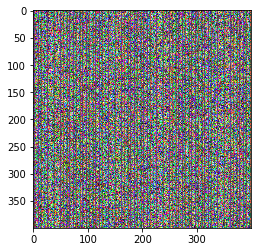

In [111]:
img = 60000*pca.components_[0]-20000*pca.components_[1]
img = np.reshape(img, (400,400,3))
img = Image.fromarray(img, mode="RGB")
imgplot = plt.imshow(img)

As expected, since my PCA accounts for so little variation, we can't really see anything resembling a bridge (which is quite unfortunate, it is a beautiful bridge! See the appendix for my images).


# References

Grus, J. (2013). T-Shirts, Feminism, Parenting, and Data Science. Retrieved October 15, from https://github.com/joelgrus/shirts/blob/master/visuals.py

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

# Appendix

Below are all the photos I used. Note that I took only two of them, and got the rest from Google Images:

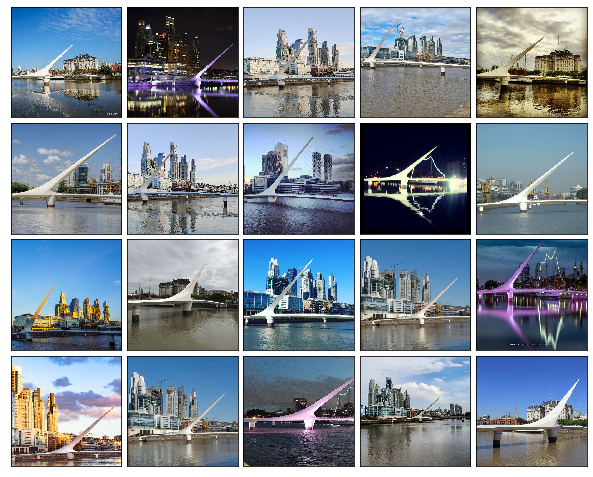

In [118]:
fig = plt.figure(figsize=(8,8)) #Setting up a figure for display
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
  img = Image.open(files[i])
  img = img.resize(STANDARD_SIZE)
  ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
  ax.imshow(img)